In [1]:
import numpy as np
import pandas
import scanpy
import scanpy as sc
import anndata
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

import numpy as np
import pandas as pd
import scanpy as sc

sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()

/home/ubuntu/.local/lib/python3.6/site-packages/numba/errors.py:104: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


scanpy==1.4 anndata==0.6.18 numpy==1.16.1 scipy==1.2.1 pandas==0.24.1 scikit-learn==0.20.2 statsmodels==0.9.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
batch_2 = anndata.read("./write/tgfb1-3-batch2.h5ad")

In [3]:
batch_per_gene = []
fc_per_gene = []
genes = []
fc_inhibitor_per_gene = []

with open("microarray_TGFb1_forMarcell.csv", "r") as f:
    current_batch = ""
    lines_skipped = 0
    
    for line in f:           
        if ">>" in line and 'all' not in line:
            line = line.split()
            current_batch = line[1]
            lines_skipped = 0
            continue
        
        if current_batch and lines_skipped < 2:
            lines_skipped += 1
            continue

        if not current_batch:
            continue
        
        line = [field for field in line.rstrip().rstrip(',').split(',')]
        
        try:
            if current_batch == "C.only":
                gene = line[1]
                fc = float(line[5])
                genes.append(gene)
                fc_per_gene.append(fc)
                #fc_inhibitor_per_gene.append(float(line[9]))
                batch_per_gene.append(current_batch)

        except:
            continue

In [4]:
len(genes)

739

#correct - this is the number of genes in the 4-way venn plot TpS vs TGF 

In [5]:
len(batch_per_gene)

739

In [6]:
len(fc_per_gene)

739

In [7]:
fc_per_gene

[-5.238989158,
 -4.37683722,
 -3.267279397,
 -3.067798113,
 -2.746048148,
 -2.640012575,
 -2.594051115,
 -2.432755084,
 -2.397237372,
 -2.362084816,
 -2.256125064,
 -2.144367653,
 -2.116448553,
 -2.097010798,
 -2.044799753,
 -2.040920879,
 -2.034346446,
 -2.029112424,
 -2.01366114,
 -1.992055187,
 -1.963524052,
 -1.954134447,
 -1.941647498,
 -1.881975501,
 -1.858670459,
 -1.849859657,
 -1.848243249,
 -1.841085576,
 -1.839660528,
 -1.835579363,
 -1.830266425,
 -1.816921655,
 -1.807265571,
 -1.784050371,
 -1.78203083,
 -1.777060008,
 -1.76761643,
 -1.750541559,
 -1.748268315,
 -1.737181163,
 -1.731321768,
 -1.71085919,
 -1.709519887,
 -1.698457846,
 -1.695376298,
 -1.687654649,
 -1.685554818,
 -1.683622316,
 -1.681357352,
 -1.676625574,
 -1.675889961,
 -1.675062931,
 -1.671462463,
 -1.66451761,
 -1.662335472,
 -1.654334222,
 -1.650402448,
 -1.650134852,
 -1.645593449,
 -1.64391439,
 -1.640081669,
 -1.639876511,
 -1.635033988,
 -1.630700912,
 -1.624596142,
 -1.618745296,
 -1.616526186,
 -

In [8]:
fc_inhibitor_per_gene

[]

In [9]:
list(zip(fc_per_gene, fc_inhibitor_per_gene))

[]

In [10]:
interesting_indices = [i for i, left in enumerate(fc_per_gene) if left < -1]

In [11]:
len(interesting_indices)

339

In [12]:
#matrix = pandas.DataFrame({"gene": genes, "batch" : batch_per_gene, "fc": fc_per_gene})

In [13]:
#interesting_genes = matrix.loc[matrix['batch'] == 'A.only']

In [14]:
#interesting_genes

In [15]:
#interesting_genes = list(interesting_genes['gene'])

In [16]:
interesting_genes = np.array(genes)[interesting_indices]

In [17]:
len(interesting_genes)

339

In [18]:
common_genes = set(batch_2.var.index).intersection(set(interesting_genes))

In [19]:
len(common_genes)

30

In [20]:
common_genes

{'BAALC',
 'BTG3',
 'CDC42',
 'COL3A1',
 'CTHRC1',
 'CTNNB1',
 'EDN1',
 'FBXO32',
 'FGF1',
 'FRMD6',
 'FST',
 'GAS6',
 'ID1',
 'KCTD16',
 'KRT7',
 'LOX',
 'LRRN3',
 'NAV3',
 'NMB',
 'PDGFRB',
 'PDS5B',
 'PTGS2',
 'PTHLH',
 'RGS4',
 'RRAD',
 'RUNX1T1',
 'SLC4A7',
 'SPOCD1',
 'TLE4',
 'TREM1'}

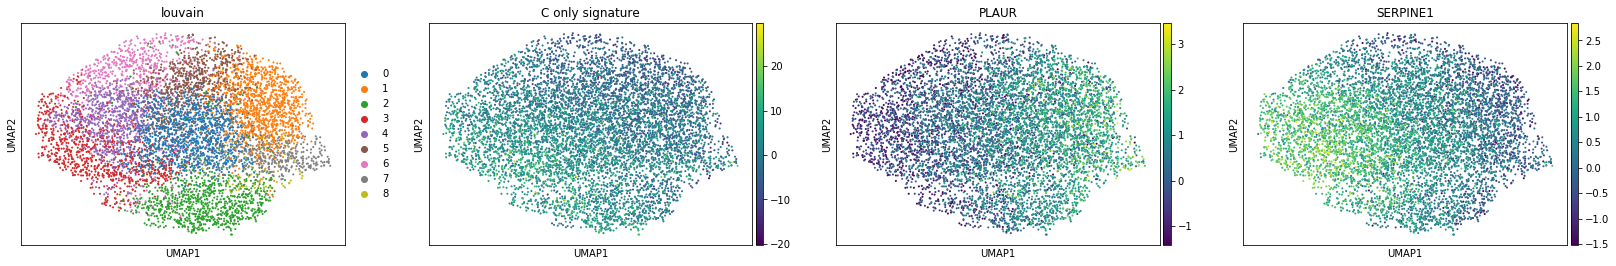

In [22]:
batch_2.obs["C only signature"] = batch_2[:,list(common_genes)].X.sum(1)
sc.pl.umap(batch_2, color=['louvain', 'C only signature', "PLAUR", "SERPINE1"])